In [ ]:
TITLE: ProDy_autoanaly.ipynb

PURPOSE: <GOES HERE>

PROJECT: <GOES HERE>

AUTHOR: Jacob Lloyd North

INSTITUTION: Oregon State University

PRECONDITIONS: 

INPUTS: 

OUTPUTS: 

SECTION 1: Include commonly used libraries

In [8]:
# Maths and visualization libraries
import numpy as np          # NumPy
import scipy        # Import all of SciPy
import networkx 
# import pathpy2
import matplotlib.pyplot as plt     # Matplotlib
import umap

In [9]:
%matplotlib inline

In [10]:
# Machine learning libraries
# import sklearn
# import torch             # Import all of PyTorch
# import fastai            # Import all of FastAi
# import pydbm            # boltzmann machines

In [12]:
# BIOLOGY-SPECIFIC LIBRARIES
# Bioinformatics
import biopandas
import Bio          # Biopython
# import pdbtools     # Useful for dealing with pdbs
import dlpdb        # Useful for parsing PDB
# import proteincsm   # Symmetry calculation
# import protein        # Utils for UniProt
# import cathpy
# import pydpi
# import isambard
import pyuniprot
# import elaspic
# import aesop
# import backmap

# import openproteindesign

# import tssv
# import propka
# import bio-pyvol
# import discere

import ssbio

# Structural Biology
import RamachanDraw
import biographs
# import biskit       # BUILD FAILS
# import aleph        # Molecular replacement library
from ensemblator.ensemblator_core import analyze, prepare_input     # Clark, Brereton, Karplus
# import paramagpy      # NMR paramagnetism
# import povme          # Measure volume of pockets in a protein structure
# import gmx-clusterByFeatures

# Molecular Dynamics
# import gromacs

# Kinetics
# import pybindingcurve

# import ContactVis

# import usum

# MD analysis
import mdtraj           # Import all of MDTraj
import MDAnalysis
# import pychimera

# Protein Dynamics
import prody as pd            # Protein dynamics
# import pydtmc           # discrete-time markov chains
# Normal modes of motion
# import pydmd            # Dynamic mode decomposition
# import pynamical        # Dynamical systems 
import pyemma
# import molpx
import msmtools
# import pysfd
# import ipymol
# import pypcazip

In [ ]:
# PHYSICAL CHEMISTRY LIBRARIES

# Quantum chemistry libraries
# import quantum_dynamics
# import qutip

# Statistical thermodynamics
# import curp         # energy (heat) flow analysis -- ONLY in Python2 currently!

In [ ]:
# Cellular biology
# import pysces       # Will copy stuff to Pysces directory for model!

In [ ]:
# UTILITY LIBRARIES
import wget         # to download pdb files

In [ ]:
# DEBUG
# import mdbenchmark  # For optimizing core usage in low-resources machines

SECTION 2: MAIN

In [18]:
# Get PDB
PDB_id = input("Please enter a PDB ID:")
pro_name = input("Enter a name label:")
# Print Ramachandran plot of the protein
from RamachanDraw import fetch, phi_psi, plot
plot(fetch(PDB_id))     # Draw the Ramachandran plot
plot('md_0_1_trajectory_nowater.pdb')

# Generating a dictionary to store the phi and psi angles, also return the ignored AA
phi_psi_dict, ignored_res = phi_psi(fetch(PDB_id), return_ignored=True)

# ProDy testing

Desired structure doesn't exists


AssertionError: Unable to fetch file: PDB/pdb.ent. PDB entry probably does not exist.

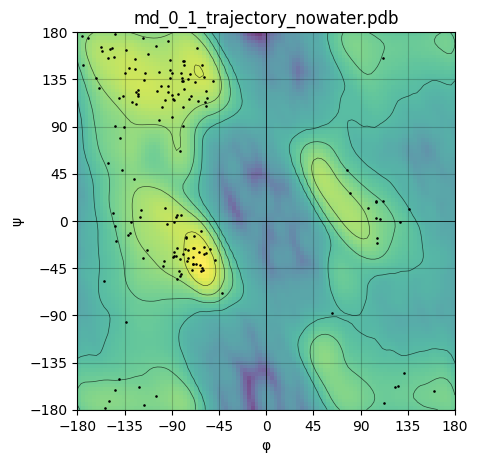

In [5]:
# Label your protein
pro_filename = "md_0_1_trajectory_nowater.pdb"
pro_name = input("Enter a name label:")

from RamachanDraw import fetch, phi_psi, plot
plot(pro_filename)     # Draw the Ramachandran plot


In [15]:
# prot = pd.parsePDB(PDB_id)
pro = pro_filename
# Print useful statistics
print("Radius of gyration:", pd.calcGyradius(pro))
print("Number of atoms:", prot.numAtoms())
print("Number of Coordinate sets:", prot.numCoordsets())
print("Number of residues:", prot.numResidues())
pd.showProtein(prot)

TypeError: atoms must have atomic coordinate data

PRINCIPAL COMPONENT ANALYSIS

In [22]:
# Prepare the ensemble
#pro = pd.parsePDB(PDB_id, subset='calpha')
pro = pd.parsePDB('md_0_1_trajectory_nowater.pdb', subset = 'calpha')

pro_selection = pro.select('resnum < ' + str(pro.numResidues()))
pro_ensemble = pd.Ensemble(pro_selection)
# pro_ensemble.setCoords()
pro_ensemble.iterpose()

@> Superposing  [100%] 0s

In [23]:
# Run PCA 
pca = pd.PCA(pro_name)
pca.buildCovariance(pro_ensemble)
pca.calcModes()

In [24]:
# Observe top 6 ranked principal components
for mode in pca[:6]:
    print(pd.calcFractVariance(mode).round(2))
# Save the principal modes
# pd.saveModel(pca)

0.14
0.09
0.07
0.05
0.04
0.04


ANISOTROPIC NETWORK MODEL


In [25]:
anm = pd.ANM(pro_name) # instantiate ANM object
anm.buildHessian(pro_selection) # build Hessian matrix for selected atoms
anm.calcModes() # calculate normal modes
# saveModel(anm)

In [26]:
# Access individual mode instances
slowest_mode = anm[0]
print( slowest_mode )
print( slowest_mode.getEigval().round(3) )

Mode 1 from ANM cypA_traj
1.69


In [27]:
# Observe top 6 ranked principal components
for mode in anm[:6]:
    print(pd.calcFractVariance(mode).round(2))

0.1
0.1
0.09
0.07
0.05
0.05


In [28]:
# Confirm mode orthogonality - dot product of mode vectors
print((anm[0] * anm[1]).round(10))
print((anm[0] * anm[2]).round(10))

0.0
0.0


COMPARING EXPERIMENTAL AND THEORETICAL RESULTS

In [52]:
# Compare overlap table of PCA and ANM
pd.printOverlapTable(pca[:6], anm[:6])
ot = pd.showOverlapTable(pca[:6], anm[:6])
ot[2]

Overlap Table
                                ANM cypA_traj
                     #1     #2     #3     #4     #5     #6
PCA cypA_traj #1   -0.13  -0.34  +0.27  -0.11  +0.03  -0.26
PCA cypA_traj #2    0.00  +0.33  +0.41  -0.14  +0.11  +0.12
PCA cypA_traj #3   +0.46   0.00  +0.39  +0.16  -0.07  -0.12
PCA cypA_traj #4   -0.28  -0.21  +0.04  +0.15  -0.09  +0.01
PCA cypA_traj #5   +0.27  -0.18  -0.27  +0.31  +0.15  -0.11
PCA cypA_traj #6   +0.34  +0.46  -0.14  +0.15  -0.11  +0.18



AttributeError: 'Colorbar' object has no attribute 'figsave'

DATA OUTPUT

In [40]:
# Write Normal Modes for PCA data
pd.writeNMD(pro_name + '_' + PDB_id + '_pca.nmd', pca[:6], pro_selection)         # NMD format for nm wizard
pd.writeArray('ubi_pca_modes.txt', pca.getArray(), format='%8.3f')     # text

'ubi_pca_modes.txt'

In [33]:
# Write Normal Modes for ANM data
pd.writeNMD(pro_name + '_' + PDB_id + '_anm.nmd', anm[:6], pro_selection)         # NMD format for nm wizard

'cypA_traj__anm.nmd'

In [34]:
# pd.pathVMD('/Users/jacobnorth/Applications/VMD\ 1.9.4.app/Contents/MacOS/startup.command')
# pd.viewNMDinVMD('ubi_pca.nmd')

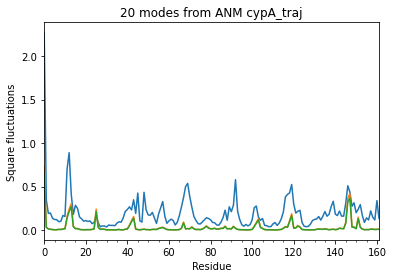

In [37]:
pd.showSqFlucts(pca[::]);
pd.showSqFlucts(anm[::]);
pd.showNormedSqFlucts(anm[::]);

EVOLUTIONARY ANALYSIS - EVOL

In [ ]:
pkey
type(pkey)
(list(pkey))[0]
print("PDB ID:", PDB_id)
print("full_MSA=", full_MSA)
print("MSA=", msa)

In [ ]:
# Download the full MSA file for protein family
pkey = pd.searchPfam(PDB_id).keys()      # obtain the key
full_MSA = pd.fetchPfamMSA((list(pkey))[0])        # Fetch the full MSA
msa = pd.parseMSA(full_MSA)        # Parse the MSA
# Refine MSA to remove gappy entries
msa_refine = pd.refineMSA(msa, label=PDB_id, rowocc=0.8, seqid=0.98)

In [ ]:
# Occupancy calculation
pd.showMSAOccupancy(msa_refine, occ='res')
calcMSAOccupancy(msa_refine, occ='res').min()   # Find the minimum

# Shannon entropy
entropy = calcShannonEntropy(msa_refine)
showShannonEntropy(entropy, indices)
mutinfo = buildMutinfoMatrix(msa_refine)
mutinfo_norm = applyMutinfoNorm(mutinfo, entropy, norm='minent')
mutinfo_corr = applyMutinfoCorr(mutinfo, corr='apc')
showMutinfoMatrix(mutinfo)
showMutinfoMatrix(mutinfo_corr, clim=[0, mutinfo_corr.max()], xlabel=pro_name)
writeArray(pro_name + 'array.txt', mutinfo)
# Sequence-structure comparison - http://prody.csb.pitt.edu/tutorials/evol_tutorial/comparison.html